In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw data
df = pd.read_csv("crypto_top50_inr.csv")

# Rename columns for clarity
df.rename(columns={
    "id": "coin",
    "current_price": "price_in_inr",
    "total_volume": "trading_volume_inr"
}, inplace=True)

# Add extra features
df["log_price"] = np.log(df["price_in_inr"])
df["volatility_score"] = df["price_change_percentage_24h"].abs()

# Save cleaned file
df.to_csv("crypto_cleaned_inr.csv", index=False)

df


,coin,symbol,name,price_in_inr,market_cap,trading_volume_inr,high_24h,low_24h,price_change_percentage_24h,last_updated,log_price,volatility_score
0,bitcoin,btc,Bitcoin,1.015635e+07,202358541046622,3384245908850,1.021276e+07,1.009315e+07,0.09813,2025-09-16 17:27:03.436670,16.133610,0.09813
1,ethereum,eth,Ethereum,3.964910e+05,47878939417776,2283202673373,4.000570e+05,3.945920e+05,-0.74809,2025-09-16 17:27:03.436670,12.890409,0.74809
2,ripple,xrp,XRP,2.669100e+02,15941024873994,449652780954,2.676100e+02,2.617700e+02,0.94449,2025-09-16 17:27:03.436670,5.586912,0.94449
3,tether,usdt,Tether,8.808000e+01,14994863996799,7191355699265,8.823000e+01,8.802000e+01,-0.12892,2025-09-16 17:27:03.436670,4.478245,0.12892
4,binancecoin,bnb,BNB,8.173400e+04,11376192022549,104368221374,8.214200e+04,8.056300e+04,0.72327,2025-09-16 17:27:03.436670,11.311225,0.72327
5,solana,sol,Solana,2.073800e+04,11255994343520,659536743898,2.092600e+04,2.032900e+04,-0.31553,2025-09-16 17:27:03.436670,9.939723,0.31553
6,usd-coin,usdc,USDC,8.804000e+01,6444983613022,674776779746,8.817000e+01,8.798000e+01,-0.10637,2025-09-16 17:27:03.436670,4.477791,0.10637
7,dogecoin,doge,Dogecoin,2.332000e+01,3518946557114,319056796202,2.378000e+01,2.313000e+01,-0.35687,2025-09-16 17:27:03.436670,3.149311,0.35687
8,staked-ether,steth,Lido Staked Ether,3.960390e+05,3408398508325,3799496320,3.994380e+05,3.934900e+05,-0.78215,2025-09-16 17:27:03.436670,12.889268,0.78215
9,tron,trx,TRON,3.047000e+01,2884839708909,57463964443,3.055000e+01,3.020000e+01,0.02751,2025-09-16 17:27:03.436670,3.416743,0.02751


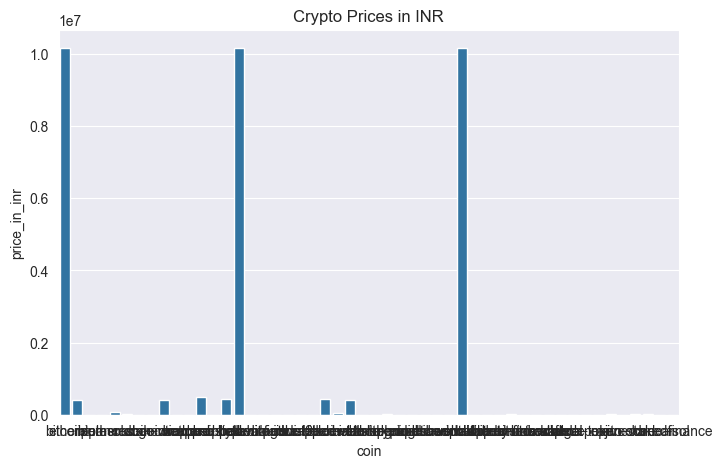

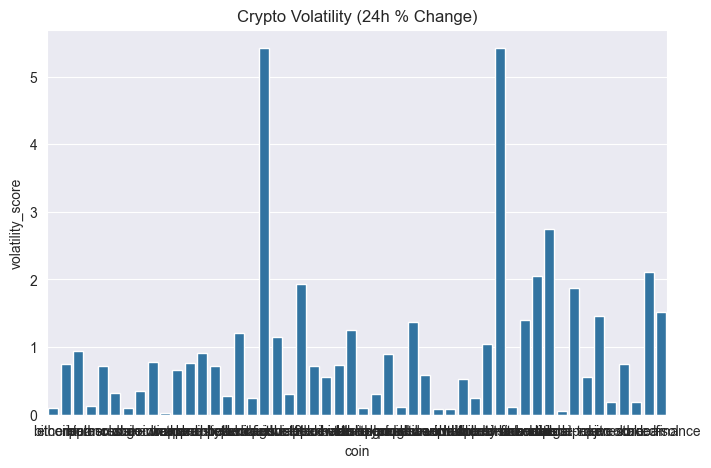

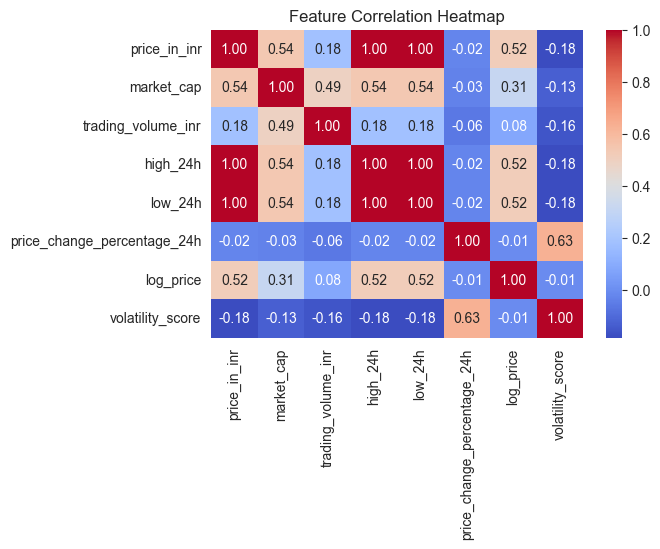

In [4]:
# Price comparison
plt.figure(figsize=(8,5))
sns.barplot(x="coin", y="price_in_inr", data=df)
plt.title("Crypto Prices in INR")
plt.show()

# Volatility comparison
plt.figure(figsize=(8,5))
sns.barplot(x="coin", y="volatility_score", data=df)
plt.title("Crypto Volatility (24h % Change)")
plt.show()

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


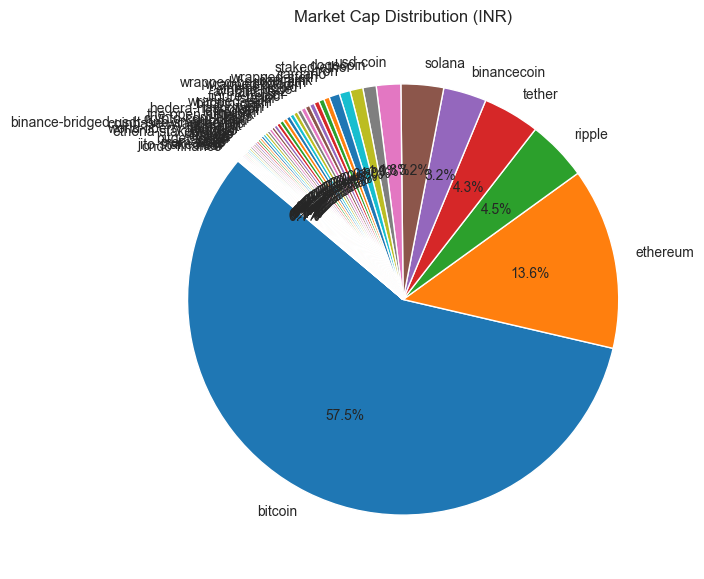

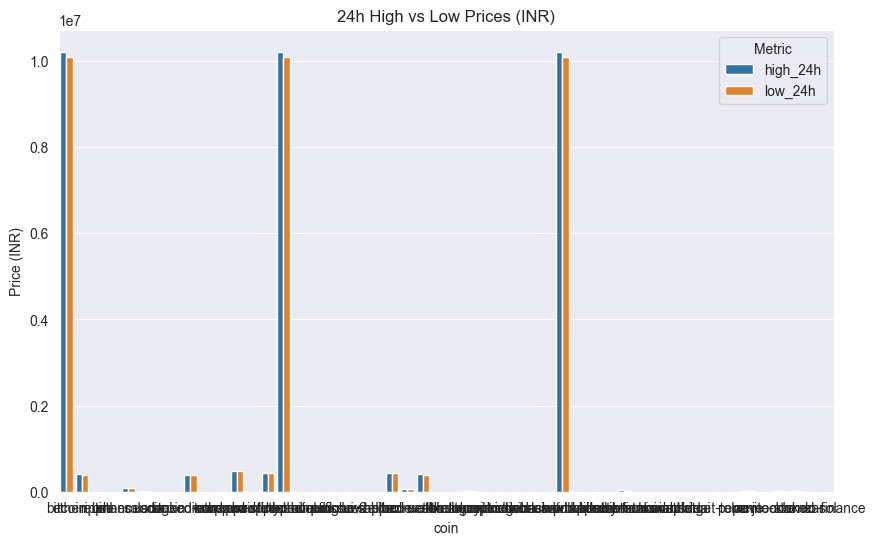

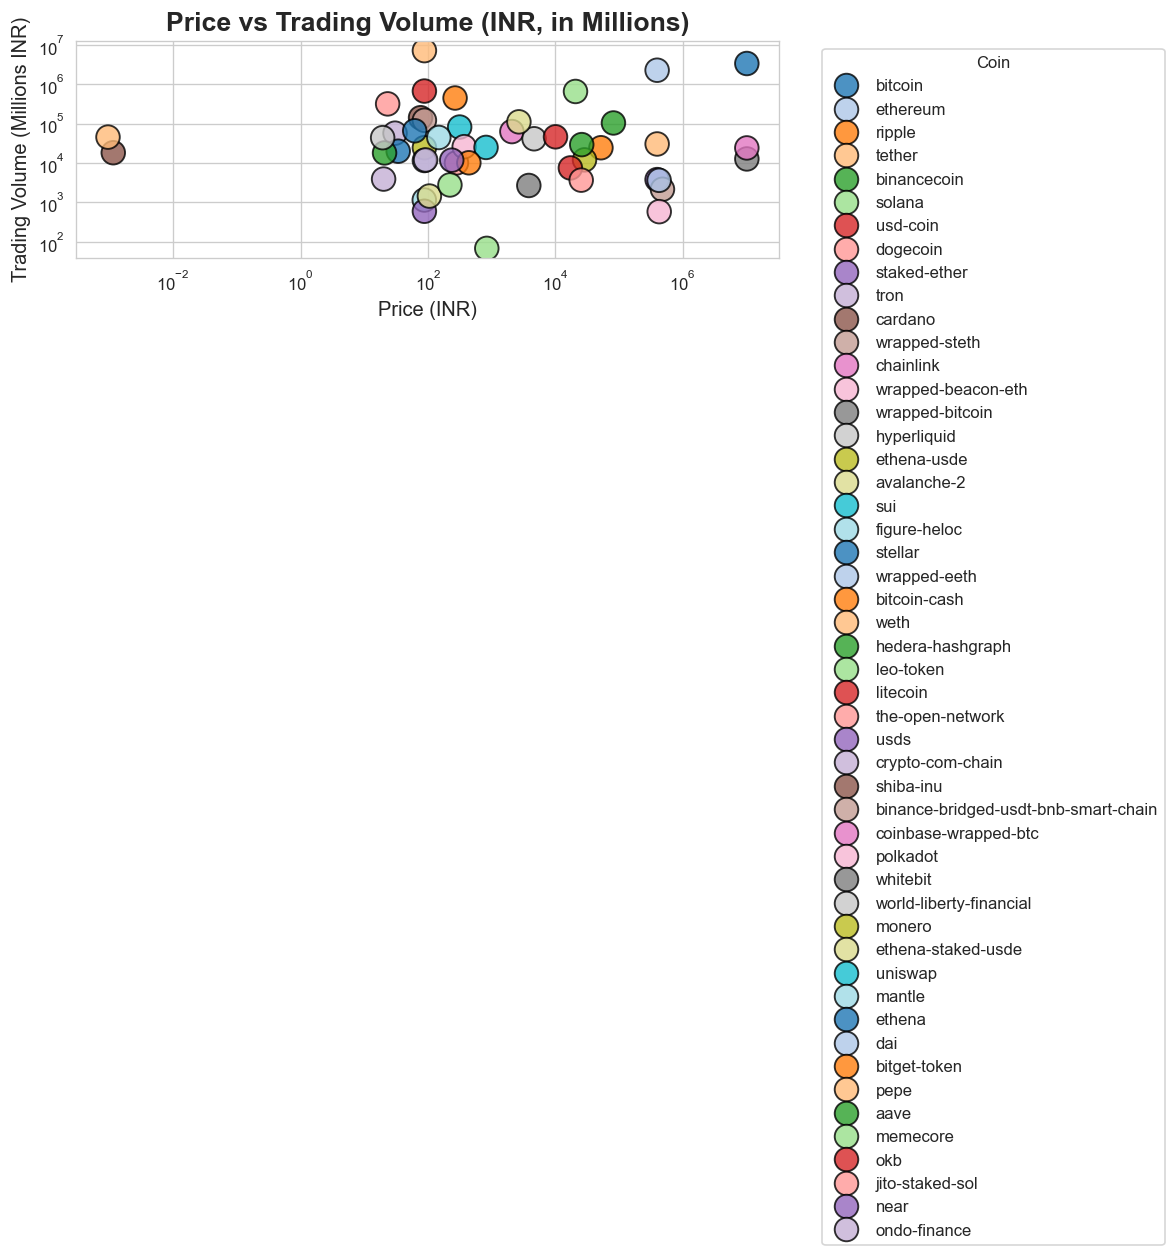

In [5]:
# Market Cap Share
plt.figure(figsize=(7,7))
plt.pie(df["market_cap"], labels=df["coin"], autopct="%1.1f%%", startangle=140)
plt.title("Market Cap Distribution (INR)")
plt.show()


# High vs Low Price
plt.figure(figsize=(10,6))
df_melted = df.melt(id_vars="coin", value_vars=["high_24h", "low_24h"], var_name="Metric", value_name="Price (INR)")
sns.barplot(x="coin", y="Price (INR)", hue="Metric", data=df_melted)
plt.title("24h High vs Low Prices (INR)")
plt.show()

# Remove rows with missing or zero values
df_scatter = df.dropna(subset=["price_in_inr", "trading_volume_inr"])
df_scatter = df_scatter[(df_scatter["price_in_inr"] > 0) & (df_scatter["trading_volume_inr"] > 0)]

# Optional: convert trading volume to millions for readability
df_scatter["trading_volume_millions"] = df_scatter["trading_volume_inr"] / 1_000_000

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10,7), dpi=120)

# Scatter plot
sns.scatterplot(
    x="price_in_inr",
    y="trading_volume_millions",
    hue="coin",
    palette=sns.color_palette("tab20", n_colors=df_scatter['coin'].nunique()),
    s=200,
    alpha=0.8,
    edgecolor="k",
    data=df_scatter
)

# Log scale (optional, for better visualization if prices/volumes vary a lot)
plt.xscale('log')
plt.yscale('log')

# Titles and labels
plt.title("Price vs Trading Volume (INR, in Millions)", fontsize=16, fontweight='bold')
plt.xlabel("Price (INR)", fontsize=12)
plt.ylabel("Trading Volume (Millions INR)", fontsize=12)

# Legend outside plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Coin", fontsize=10)
plt.tight_layout()
plt.show()


